<a href="https://colab.research.google.com/github/guylozius/Guy-Lozius/blob/master/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Mushroom Dataset

Source of data: https://www.kaggle.com/datasets/uciml/mushroom-classification

- Description: The dataset shows different feature of a list mushroom. 

- Target: Is it poisonous(class column)

- This a classification  problem

- There are  8124 rows and 23 columns.

- The dataset is from a hypothetical samples, so I do not know,<br/> if it
will be a good prediction on other dataset similar to it.



In [ ]:
mushroom_df = pd.read_csv('/content/drive/MyDrive/coding dojo/stack_two/Project 2/mushrooms.csv')
mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
# Getting the number of rows and columns
mushroom_df.shape

(8124, 23)

> There are  8124 rows and 23 columns in this dataset.

##Cleaning Data

In [ ]:
# Looking at the dataset columns type and missing value
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

> All the columns are set as object and there are no  misssing value in this dataset.

In [ ]:
#Checking all the values in each columns
for col in mushroom_df.columns:
  print(f'{col}:')
  print(mushroom_df[col].value_counts())
  print("\n\n")

class:
e    4208
p    3916
Name: class, dtype: int64



cap-shape:
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64



cap-surface:
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64



cap-color:
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64



bruises:
f    4748
t    3376
Name: bruises, dtype: int64



odor:
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64



gill-attachment:
f    7914
a     210
Name: gill-attachment, dtype: int64



gill-spacing:
c    6812
w    1312
Name: gill-spacing, dtype: int64



gill-size:
b    5612
n    2512
Name: gill-size, dtype: int64



gill-color:
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64



stalk-shape:
t    4608
e    3516
Name: stalk-sha

> In the stalk_root column the value "?" stand for missing value

In [ ]:
# Looking for pattern for missing values
for col in mushroom_df.columns:
  print(col,':\n')
  print(mushroom_df.groupby(col)['stalk-root'].value_counts(dropna=False))
  print('\n\n')

class :

class  stalk-root
e      b             1920
       e              864
       ?              720
       c              512
       r              192
p      b             1856
       ?             1760
       e              256
       c               44
Name: stalk-root, dtype: int64



cap-shape :

cap-shape  stalk-root
b          c              258
           ?              152
           b               42
c          b                2
           c                2
f          b             1778
           ?              720
           e              544
           r               96
           c               14
k          ?              792
           b               22
           c               14
s          e               32
x          b             1932
           ?              816
           e              544
           c              268
           r               96
Name: stalk-root, dtype: int64



cap-surface :

cap-surface  stalk-root
f            b             

> There were no pattern for to infer the data of missing value. I will replace '?' with nan than fill it with and than I will impute it with most frequent value later on.

In [ ]:
#replacing ? with nan
mushroom_df.replace('?', np.nan , inplace=True)
#checking for nan values
mushroom_df.isna().sum().any()

True

## Visualize data

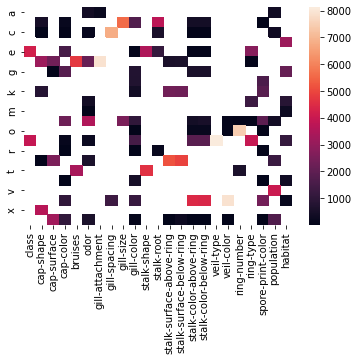

In [104]:
#Making a heatmap
counts = mushroom_df.apply(pd.value_counts)
sns.heatmap(counts)

#Income of Adults Dataset

Source of data: https://www.kaggle.com/datasets/siddharthss/crop-recommendation-dataset

- Description: Dataset show type of crops and factors they growth 
- Target is 'label' the type of crop
- There 15features and 48842 rows 
- Classification problem
- How to deal with the missing values.

In [ ]:
Adults_df = pd.read_csv('/content/drive/MyDrive/coding dojo/stack_two/Project 2/adult.csv')
Adults_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
## Getting the number of rows and columns
Adults_df.shape

(48842, 15)